In [1]:
# print('### OS ###')
# !cat /etc/issue.net

# print('### CPU ###')
# !cat /proc/cpuinfo

# print('### MEM ###')
# !cat /proc/meminfo

# print('### DISK ###')
# !df -h

# print('### GPU ###')
# !nvidia-smi

In [2]:
import tensorflow as tf
print(tf.__version__)

import torch
import torchvision
import torchtext
print(torch.__version__)

2.4.1
1.7.1+cu101


In [5]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# 환경을 만든다.
env = gym.make("FrozenLake-v0")

# 환경의 상태를 출력한다
env.render() 


SFFF
FHFH
FFFH
HFFG


# add random noise


SFFF
FHFH
FFFH
HFFG
success rate: 0.023
Final Q-table values
left down right up
[[0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.86874581 0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.77782136 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]


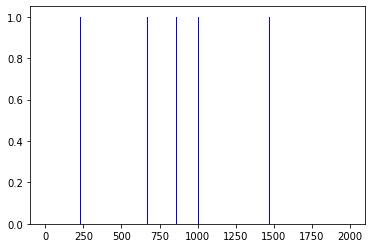

In [15]:
state = env.reset()
env.render() 

# 상태와 액션의 쌍으로 된 공간을 만들고 0으로 초기화 = Q 함수를 0으로 초기화한다
Q = np.zeros([env.observation_space.n, env.action_space.n]) 

dis = .99  # discount factor
num_episodes = 2000  # 게임 수행하며 학습할 횟수
rList = []  # 게임 결과 저장. (reward의 총합)

for i in range(num_episodes):
  # 새 게임이므로 상태 초기화한다.
  # Q 함수를 초기화하지 않는 것에 주목
  state = env.reset()
  rAll = 0
  done = False

  # 게임 종료될 때까지 (goal을 찾을 때까지) 반복한다.
  while not done:
    # 현재 상태에서 어떤 행동을 할지 결정한다.
    # Q 함수의 값 + 랜덤 노이즈 + decaying이 적용되었다.
    action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1))

    # 결정한 행동을 취한 결과에 대한 상태와 보상 등의 정보를 가져온다.
    new_state, reward, done, _ = env.step(action)

    # 상태와 행동 쌍의 공간에 결과를 기록한다 = Q 함수를 갱신한다.
    # future reward에 dis가 곱해진 것을 확인하자.
    Q[state, action] = reward + dis * np.max(Q[new_state, :])

    # goal 까지 가는 동안의 reward를 모두 더한다. (이 예제의 경우 찾으면 1 아니면 0이된다.)
    rAll += reward
    state = new_state
  
  rList.append(rAll)

print('success rate: ' + str(sum(rList)/num_episodes))
print('Final Q-table values')
print('left down right up')
print(Q)
plt.bar(range(len(rList)), rList, color='blue')
plt.show()

# learning rate 추가


SFFF
FHFH
FFFH
HFFG
success rate: 0.6365
Final Q-table values
left down right up
[[5.48549491e-01 3.17637935e-03 2.96252160e-02 2.77552724e-02]
 [2.04675724e-03 3.29724226e-04 4.34168502e-03 4.73469090e-01]
 [0.00000000e+00 2.32353444e-01 3.15469732e-03 1.89202011e-02]
 [2.57979288e-03 6.09886793e-06 2.13160774e-04 3.59788840e-01]
 [2.31501626e-01 1.20290070e-03 4.51356339e-04 2.66664167e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.15075596e-06 6.84598104e-05 4.35090770e-05 5.27474465e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.44622504e-03 1.39974441e-03 3.19464468e-03 6.47436837e-01]
 [3.80918014e-04 6.72293801e-01 1.57455622e-02 0.00000000e+00]
 [5.39689750e-04 8.49629840e-01 2.46810968e-04 4.51650386e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.11003897e-03 0.00000000e+00 4.08972824e-01 4.37139537e-04]
 [0.00000000e+00 9.11724163e-01 0.00

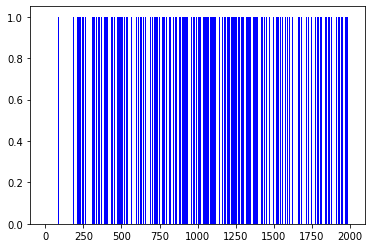

In [16]:
state = env.reset()
env.render() 

# 상태와 액션의 쌍으로 된 공간을 만들고 0으로 초기화 = Q 함수를 0으로 초기화한다
Q = np.zeros([env.observation_space.n, env.action_space.n]) 

learning_rate = .85  # 학습률. 기존의 reward + maxQ에 85% 비중을 준다.
dis = .99  # discount factor
num_episodes = 2000  # 게임 수행하며 학습할 횟수
rList = []  # 게임 결과 저장. (reward의 총합)

for i in range(num_episodes):
  state = env.reset()
  rAll = 0
  done = False

  # 게임 종료될 때까지 (goal을 찾을 때까지) 반복한다.
  while not done:
    # 현재 상태에서 어떤 행동을 할지 결정한다.
    # Q 함수의 값 + 랜덤 노이즈 + decaying이 적용되었다.
    action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1))

    # 결정한 행동을 취한 결과에 대한 상태와 보상 등의 정보를 가져온다.
    new_state, reward, done, _ = env.step(action)

    # 상태와 행동 쌍의 공간에 결과를 기록한다 = Q 함수를 갱신한다.
    # future reward에 dis가 곱해진 것을 확인하자.
    # learning_rate 가 가중치로 동작하는 것을 잘 보자.
    deter = reward + dis * np.max(Q[new_state, :])
    Q[state, action] = (1-learning_rate)*Q[state, action] + learning_rate * deter

    # goal 까지 가는 동안의 reward를 모두 더한다. (이 예제의 경우 찾으면 1 아니면 0이된다.)
    rAll += reward
    state = new_state
  
  rList.append(rAll)

print('success rate: ' + str(sum(rList)/num_episodes))
print('Final Q-table values')
print('left down right up')
print(Q)
plt.bar(range(len(rList)), rList, color='blue')
plt.show()